Task 1. Predicting the Lunar Albedo based on Chemical Composition

Relying on scientific gains on Kaggle & Google ( machine learning ) and AS a Master's AI Student
I reached these results related to this project "Machine Learning Model for the Planetary
Albedo".
I aimed to predict the albedo based on the relationships between chemical elements composing the surface of the Moon. The challenge consisted of the fact that the existing datasets were incomplete.

The experiments presented here were done with the use of the following datasets.
For the Moon:

albedo map
LPFe (iron map)
LPK (potassium map)
LPTh (thorium map)
LPTi (titanium) map.

For Mercury:

albedo map
Al to Si element ratio
Ca to Si element ratio
Fe to Si element ratio
Mg to Si element ratio
S to Si element ratio.


1.Importing Libraries

In [ ]:
import pandas as pnd #For manipulating numerical tables and time series.
import numpy as np #For operations.
from skimage.io import imread, imshow # imshow to display data as an image & imread to used to read an image from a file into an array.
import matplotlib.pyplot as plt #collection of functions that make matplotlib work like MATLAB
%matplotlib inline 
#The resulting plots will be stored in the notebook document.


Read a CSV file (Maps) with Numpy (Store as Numpy arrays)

In [ ]:
Albedo_Map=pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/Albedo_Map.csv').to_numpy()
LPFe_Map = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPFe_Map.csv').to_numpy()
LPK_Map = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPK_Map.csv').to_numpy()
LPTh_Map = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPTh_Map.csv').to_numpy()
LPTi_Map = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPTi_Map.csv').to_numpy()

#Lbl: Albedo map
#Feat:List of maps
Feat= [LPFe_Map,LPK_Map,LPTh_Map,LPTi_Map]
Lbl= Albedo_Map

In [ ]:
# using imshow to display the data of Albedo map and LPFe, LPTi, LPK, LPTh maps as image 
imshow(Albedo_Map)
print("The Albedo_Map")
fig, a = plt.subplots(1,2)
a[0].imshow(LPFe_Map)
a[1].imshow(LPTi_Map)
fig, a1 = plt.subplots(1,2)
a1[0].imshow(LPK_Map)
a1[1].imshow(LPTh_Map)

Divise and trainning 

AxesImage(10.8,27.8;410.4x245.703)


(359, 360)

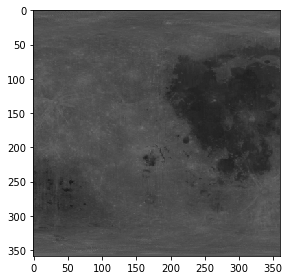

In [4]:
# divise the map on 2 and take left half for training data 
print(imshow(Lbl[:,:360]))
Lbl[:,:360].shape

Time to trainning & testing (X_tr x_ts for the 4 feats )(y_tr y_ts for Albedo map)
Flatten():used to get a copy of an given array collapsed into one dimension.

In [5]:
#Flatten():used to get a copy of an given array collapsed into one dimension.
# numpy.stack(arrays, axis)
# we need to know the dimensions of the array so we will use shape function
x_tr=np.stack((LPFe_Map[:,:360].flatten(),LPK_Map[:,:360].flatten(),LPTh_Map[:,:360].flatten(),LPTi_Map[:,:360].flatten())).T
x_ts=np.stack((LPFe_Map[:,360:].flatten(),LPK_Map[:,360:].flatten(),LPTh_Map[:,360:].flatten(),LPTi_Map[:,360:].flatten())).T
print(x_tr.shape,x_ts.shape)
y_tr=np.array(Lbl[:,:360].flatten()).T
y_ts=np.array(Lbl[:,360:].flatten()).T
print(y_tr.shape,y_ts.shape)

(129240, 4) (129240, 4)
(129240,) (129240,)


I want to solve my problem with a high level of accuracy, I see that using the Gradient Boosting  to produce a predictive model from an ensemble of weak predictive models will be useful.
1:Using sklearn.ensemble.GradientBoostingRegressor model for fitting  
(Fit data on sklearn with fit() )
2:working with MSE as metric to quantify My Algo performance
 

In [7]:
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor #model for fitting
from sklearn.metrics import mean_squared_error #to quantify My Algo performance

estim = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42, loss='ls').fit(x_tr, y_tr)
y_predict=estim.predict(x_ts)

mse=mean_squared_error(y_ts, y_predict)
print("The mean squared error is :", mse)


The mean squared error is : 0.0009403662280276238


Residual Plot for Gradient Boosting Regressor Model 
(The residual is the gradient of loss function)
(A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable).

Seeing the entire predicted Albedo map :


In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42, loss='ls').fit(x_tr, y_tr)
y_pred=est.predict(x_ts)

# printing MSE
mse=mean_squared_error(y_ts, y_pred)
print("MSE for GradientBoostingRegressor", mse)

MSE for GradientBoostingRegressor 0.0009403662280276238


Residual Plot for Gradient Boosting Regressor Model 
(The residual is the gradient of loss function)
(A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable).

The resulting prediction and plot the residuals (difference
from the true image) as a 2-D image and a 1-D histogram.


In [ ]:
from yellowbrick.regressor import ResidualsPlot
model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42, loss='squared_error')
visualizer = ResidualsPlot(model)
visualizer.fit(x_tr, y_tr)  # Fit the training data to the visualizer
visualizer.score(x_ts, y_ts)  # Evaluate the model on the test data


In [ ]:
y_pred_plot=y_pred.reshape(359,-1)
print(imshow(np.concatenate((Lbl[:,:360],y_pred_plot), axis=1)))
print("predict albedo")

Comparing with Original Albedo:


In [ ]:
print(imshow(Lbl))
print("Original albedo")

As you can observe, the GradientBoostingRegressor of the ensemble methods returned the best results in our case 

I want to use the SGDRegressor Stochastic Gradient Descent:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
scaler.fit(x_tr)  # The test data is "leaking" into our training data  - fit only on training data
x_tr = scaler.transform(x_tr)
x_ts = scaler.transform(x_ts) 
regres = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
regres.fit(x_tr,y_tr)
y_predict=regres.predict(x_ts)
print("MSE using SGDRegressor is:", mean_squared_error(y_ts,y_predict))


  Comparing Albedo prediction to the Albedo map.


In [ ]:
y_predict_plot=y_predict.reshape(359,-1)
y_test_plot=y_ts.reshape(359,-1)


print(imshow(np.concatenate((Lbl[:,:360],y_predict_plot), axis=1)))
print("The Predicted Albedo")

Again Compare with the real albedo map

In [ ]:
print(imshow(Lbl))
print("the real Albedo Map")

Task2:**Predicting Mercury’s elemental composition from Albedo with
MESSENGER Data**

Read a CSV file (Maps) with Numpy (Store as Numpy arrays)

Features: List of np.arrays of given element ratio maps
Labels: List of np.arrays of given Albedo Map

In [ ]:
albedo_top = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-top-half.png.csv').to_numpy()
albedo_bottom = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-resized-bottom-half.png.csv').to_numpy()
alsi = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/alsimap_smooth_032015.png.csv').to_numpy()
casi=pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/casimap_smooth_032015.png.csv').to_numpy()
fesi = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/fesimap_smooth_032015.png.csv').to_numpy()
mgsi = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mgsimap_smooth_032015.png.csv').to_numpy()
ssi = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/ssimap_smooth_032015.png.csv').to_numpy()
albedo_top = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-top-half.png.csv').to_numpy()
albedo_bottom = pnd.read_csv('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-resized-bottom-half.png.csv').to_numpy()

Feats= [alsi,casi,fesi,mgsi,ssi]
Labls= [albedo_top,albedo_bottom]

Cloning maps for verification's sake 

In [ ]:
imshow(albedo_bottom)
print(albedo_bottom.shape)

In [ ]:
import numpy as np
import seaborn as sb
sb.set_theme()
axe = sb.heatmap(mgsi, cmap='viridis')

In [ ]:
a = sb.heatmap(alsi, cmap='viridis')

In [ ]:
a = sb.heatmap(fesi, cmap='viridis')

In [ ]:
a = sb.heatmap(casi, cmap='viridis')

In [ ]:
a = sb.heatmap(ssi, cmap='viridis')

Resize to devise Albedo map to use the top half for trainnig and bottom half to testing

use a model to train your algorith to find relationships between albedo and chemical
composition in the top of the planet. Then, make a prediction about chemical
composition for the bottom half of the planet using the albedo

In [ ]:
from skimage.transform import resize
#X for albedo Y for elements 
albedo_top = resize(albedo_top, (albedo_top.shape[0] // 2, albedo_top.shape[1]), anti_aliasing=True)
albedo_bottom = resize(albedo_bottom, (albedo_bottom.shape[0] // 2, albedo_bottom.shape[1]), anti_aliasing=True)
#trainning & testing X
x_tr=np.array([albedo_top.flatten()]).T
x_ts=np.array([albedo_bottom.flatten()]).T
print(x_tr.shape,x_ts.shape)
#trainning & testing  Y
y_tr_alsi=np.array(alsi[:359,:].flatten()).T
y_tr_casi=np.array(casi[:359,:].flatten()).T
y_tr_fesi=np.array(fesi[:359,:].flatten()).T
y_tr_mgsi=np.array(mgsi[:359,:].flatten()).T
y_tr_ssi=np.array(ssi[:359,:].flatten()).T
y_ts_alsi=np.array(alsi[359:-1,:].flatten()).T
y_ts_casi=np.array(casi[359:-1,:].flatten()).T
y_ts_fesi=np.array(fesi[359:-1,:].flatten()).T
y_ts_mgsi=np.array(mgsi[359:-1,:].flatten()).T
y_ts_ssi=np.array(ssi[359:-1,:].flatten()).T
print(y_tr_fesi.shape,y_ts_fesi.shape)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

def Predict(y_tr,y_ts,element):
  estim = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1,n_estimators=100,max_depth=1, random_state=None).fit(x_tr, y_tr)
  y_predict=estim.predict(x_ts)
  mse=mean_squared_error(y_ts, y_predict)
  print("MSE for %s using GradientBoostingRegressor:"%element, mse)
  return y_predict

y_pred_alsi=Predict(y_tr_alsi,y_ts_alsi,"Al-Si")
y_pred_fesi=Predict(y_tr_fesi,y_ts_fesi,"Fe-Si")
y_pred_mgsi=Predict(y_tr_mgsi,y_ts_fesi,"Mg-Si")
y_pred_casi=Predict(y_tr_casi,y_ts_fesi,"Ca-Si")
y_pred_ssi=Predict(y_tr_ssi,y_ts_fesi,"S-Si")



  Comparing predictions for Al-Si

In [ ]:
y_pred_plot_al= y_pred_alsi.reshape(359,-1)
y_ts_plot_al=y_ts_alsi.reshape(359,-1)

print(sb.heatmap(y_pred_plot_al,cmap='viridis'))

In [ ]:
# Real Map
print(sb.heatmap(y_ts_plot_al, cmap='viridis'))


  Comparing predictions for Fe-Si


In [ ]:
y_pred_plot_fe= y_pred_fesi.reshape(359,-1)
y_ts_plot_fe=y_ts_fesi.reshape(359,-1)
print(sb.heatmap(y_pred_plot_fe,cmap='viridis'))

Real Map



Comprison for Fe-Si

In [ ]:
y_pred_plot_s= y_pred_ssi.reshape(359,-1)
y_test_plot_s=y_ts_ssi.reshape(359,-1)
print(sb.heatmap(y_pred_plot,cmap='viridis'))


Real map

In [ ]:
print(sb.heatmap(y_ts_plot_fe, cmap='viridis'))

  Comparing predictions for Mg-Si


In [ ]:
y_pred_plot_mg= y_pred_mgsi.reshape(359,-1)
y_ts_plot_mg=y_ts_mgsi.reshape(359,-1)
print(sb.heatmap(y_pred_plot_mg,cmap='viridis'))

Real map

In [ ]:
print(sb.heatmap(y_ts_plot_mg, cmap='viridis'))

  Comparing predictions for Ca-Si


In [ ]:
y_pred_plot_ca= y_pred_casi.reshape(359,-1)
y_ts_plot_ca=y_ts_casi.reshape(359,-1)
print(sb.heatmap(y_pred_plot_ca,cmap='viridis'))


Real Map 

In [ ]:
print(sb.heatmap(y_ts_plot_ca, cmap='viridis'))

  Comparing predictions for S


In [ ]:
y_pred_plot_s= y_pred_ssi.reshape(359,-1)
y_ts_plot_s=y_ts_ssi.reshape(359,-1)
print(sb.heatmap(y_pred_plot_s,cmap='viridis'))


Real map

In [ ]:
print(sb.heatmap(y_ts_plot_s, cmap='viridis'))